In [1]:
zip([1,2,3],[4,5,6])

[(1, 4), (2, 5), (3, 6)]

In [5]:
import pandas as pd
data = pd.read_csv('Player.csv',',')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [49]:
from sklearn import svm
labels = []
for i in range(10):
    svm_ = svm.OneClassSVM(gamma=1./(i+1), nu=0.001) 
    svm_.fit(data[['height','weight']])
    labels.append(svm_.predict(data[['height','weight']]))

In [50]:
for i in labels:
    print (i==1).mean()

0.772332730561
0.316184448463
0.495569620253
0.452169981917
0.457866184448
0.506419529837
0.462296564195
0.512296564195
0.527215189873
0.470524412297


In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

In [106]:
svm_.predict([[250, 250]])

array([-1.])

In [107]:
svm_.decision_function([[250, 250]])

array([[-0.03520096]])

In [115]:
svm_.decision_function([10, 100])

C:\Users\aleh\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[-0.03520096]])

In [ ]:
data['height_corr'] = 

In [124]:
np.c_[xx1.ravel(), yy1.ravel()]

array([[ 150.        ,  100.        ],
       [ 151.01010101,  100.        ],
       [ 152.02020202,  100.        ],
       ..., 
       [ 247.97979798,  260.        ],
       [ 248.98989899,  260.        ],
       [ 250.        ,  260.        ]])

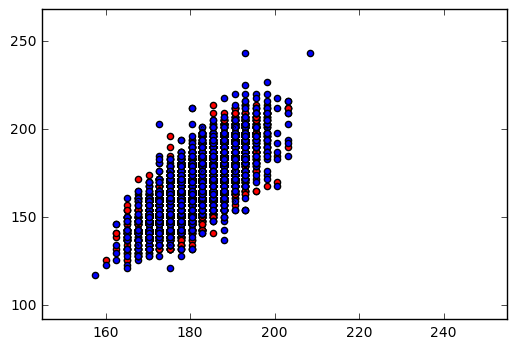

In [153]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.001,kernel='rbf') 
svm_ = svm_.fit(data[['height','weight']])
                                                                       
       
labels = svm_.predict(np.asarray(data[['height', 'weight']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(np.asarray(data[['height','weight']].values[(labels==label),0]), np.asarray(data[['height','weight']].values[(labels==label),1]),c = color)
xx1, yy1 = np.meshgrid(np.linspace(150, 250, 500), np.linspace(100, 260, 500))                                                                         
plt.figure(1)
Z1 = svm_.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')                        

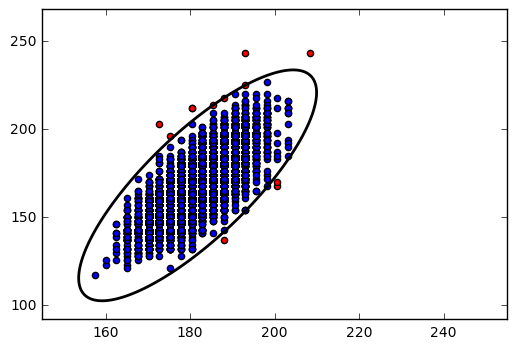

In [144]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
model = EllipticEnvelope(contamination=0.001 )
model.fit(data[['height','weight']])
labels = model.predict(np.asarray(data[['height', 'weight']]))
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(data[['height','weight']].values[(labels==label),0], data[['height','weight']].values[(labels==label),1],c = color)

xx1, yy1 = np.meshgrid(np.linspace(150, 250, 500), np.linspace(100, 260, 500))                                                                         
plt.figure(1)
Z1 = model.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)
plt.contour( xx1, yy1, Z1, levels=[0], linewidths=2, colors='black')            

In [141]:
model.decision_function([[170.18,163]])

array([ 0.85381473])

In [143]:
np.asarray(data[['height', 'weight']])

array([[ 182.88,  187.  ],
       [ 170.18,  146.  ],
       [ 170.18,  163.  ],
       ..., 
       [ 180.34,  154.  ],
       [ 185.42,  172.  ],
       [ 180.34,  176.  ]])

In [139]:
data['predict'] = model.predict(data[['height', 'weight']])

In [64]:
from sklearn.ensemble import IsolationForest
model2 = IsolationForest(max_samples=11060,
                                        contamination=0.1,
                                        random_state=1)
model2 = EllipticEnvelope(contamination=0.25)
model2.fit(data[['height','weight']])
labels = model2.predict(data[['height','weight']])
for label, color in zip((-1,1), ('red', 'blue')):
    plt.scatter(data[['height','weight']].values[(labels==label),0], data[['height','weight']].values[(labels==label),1],\
                                                                         c = color)
            

ImportError: cannot import name IsolationForest

In [66]:
(labels==1).mean()

0.00018083182640144665

In [77]:
data[['height','weight']].values[(labels==1),1]

array([ 187.,  146.])